In [1]:
import numpy as np
from hyperbolicity.tree_fitting_methods.neighbor_joining import NJ
from hyperbolicity.tree_fitting_methods.treerep import TreeRep
from hyperbolicity.tree_fitting_methods.hccfit import HccLinkage
from hyperbolicity.tree_fitting_methods.gromov import gromov_tree, buneman_extraction
from hyperbolicity.delta import compute_hyperbolicity
from hyperbolicity.tree_fitting_methods.tree_spanner import layering_approx_tree
from hyperbolicity.utils import construct_weighted_matrix, floyd_warshall
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import torch

In [ ]:
N = 20

random_graph = nx.gnp_random_graph(N, 0.3)
distances_1 = torch.from_numpy(nx.floyd_warshall_numpy(random_graph))
random_graph = nx.gnp_random_graph(N, 0.3)
distance_2 = torch.from_numpy(nx.floyd_warshall_numpy(random_graph))

for t in np.linspace(0,1,10):
    a = compute_hyperbolicity(t*distances_1+(1-t)*distance_2)
    print(f'inf {a.item()}')
    b = t*compute_hyperbolicity(distances_1)+(1-t)*compute_hyperbolicity(distance_2)
    print(f'sup {b.item()}')
    print(a<=b)


In [68]:
num_nodes = 4
edges = torch.triu_indices(num_nodes, num_nodes, offset=1)
weights = torch.rand(6)
intermediate_distances = construct_weighted_matrix(weights, num_nodes, edges)
distances_1 = floyd_warshall(intermediate_distances)

weights_2 = torch.rand(6)
intermediate_distances_2 = construct_weighted_matrix(weights_2, num_nodes, edges)
distances_2 = floyd_warshall(intermediate_distances_2)
inf = []
sup = []
for t in torch.linspace(0,1, 100):
    a = compute_hyperbolicity(t*distances_1+(1-t)*distances_2)
    b = t*compute_hyperbolicity(distances_1)+(1-t)*compute_hyperbolicity(distances_2)
    inf.append(a.item())
    sup.append(b.item())

In [69]:
compute_hyperbolicity(distances_2)

tensor(0.0155)

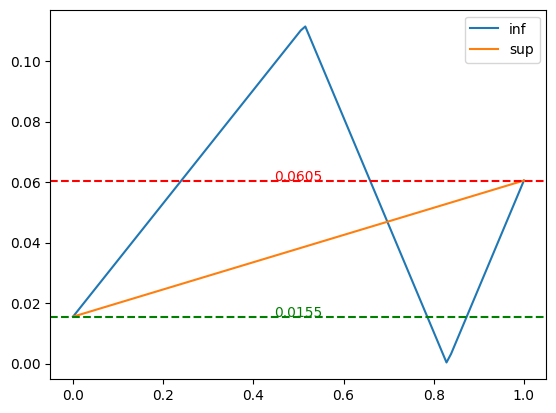

In [70]:
plt.plot(np.linspace(0, 1, 100), inf, label='inf')
plt.plot(np.linspace(0, 1, 100), sup, label='sup')
plt.legend()
plt.axhline(y=compute_hyperbolicity(distances_1).item(), color='r', linestyle='--', label='Hyperbolicity distances_1')
plt.axhline(y=compute_hyperbolicity(distances_2).item(), color='g', linestyle='--', label='Hyperbolicity distances_2')
plt.text(0.5, compute_hyperbolicity(distances_1).item(), f'{compute_hyperbolicity(distances_1).item():.4f}', color='r', ha='center')
plt.text(0.5, compute_hyperbolicity(distances_2).item(), f'{compute_hyperbolicity(distances_2).item():.4f}', color='g', ha='center')
plt.show()

In [54]:
def gap(x,y,z):
    l = [x,y,z]
    l.sort
    return l[2]-l[1]